In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import os
from sklearn import preprocessing  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
import missingno as msno

<AxesSubplot:>

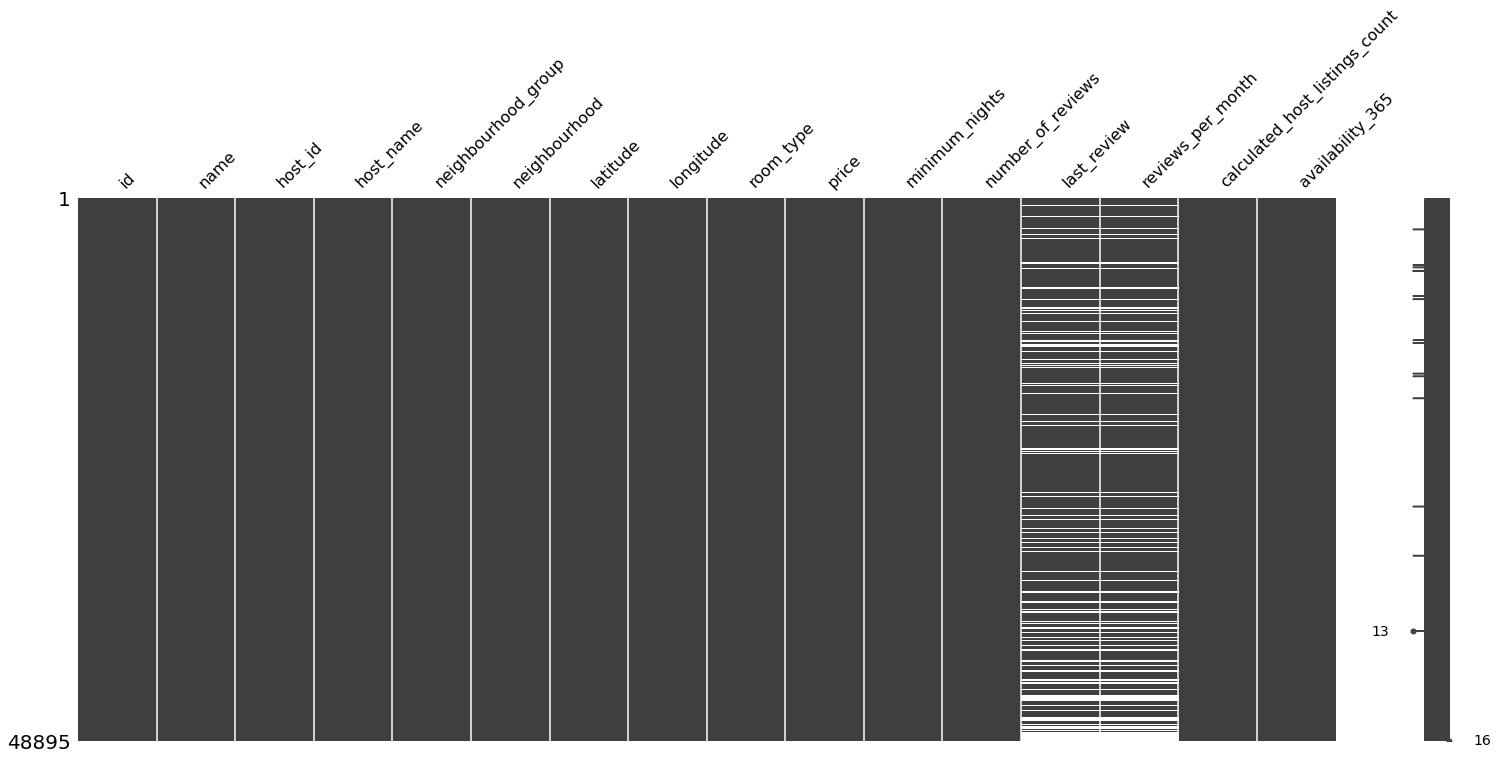

In [7]:
msno.matrix(df)

<AxesSubplot:>

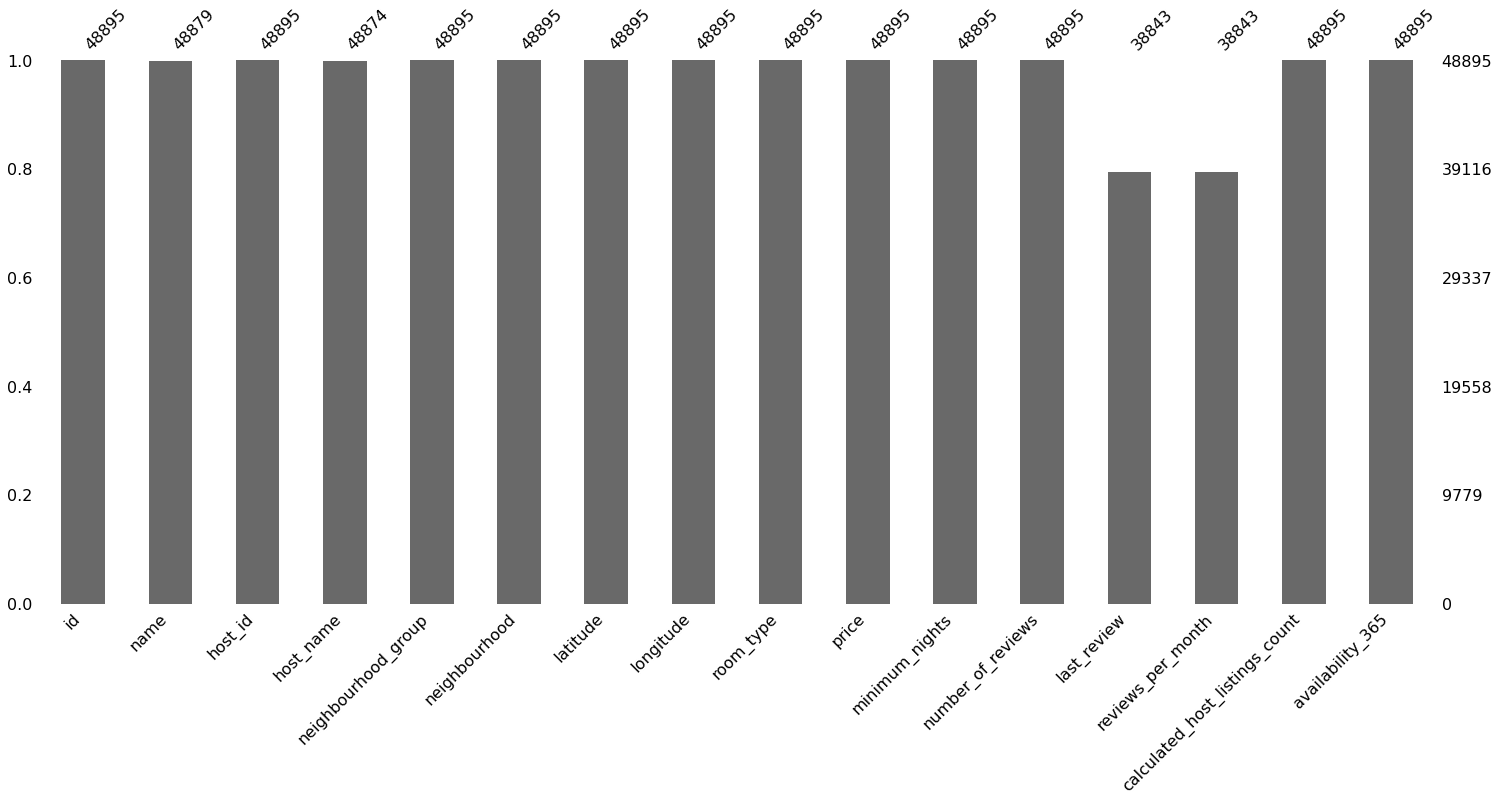

In [8]:
msno.bar(df)

In [9]:
df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df = df.drop('host_name',axis=1)

In [13]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [14]:
df.shape

(38821, 15)

In [15]:
df.isna().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [17]:
df.describe

<bound method NDFrame.describe of              id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

     

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

<AxesSubplot:>

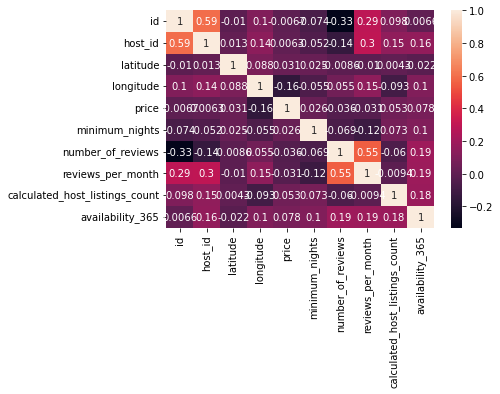

In [19]:
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True) 

In [20]:
import warnings
warnings.filterwarnings('ignore')

Data visualization

In [21]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

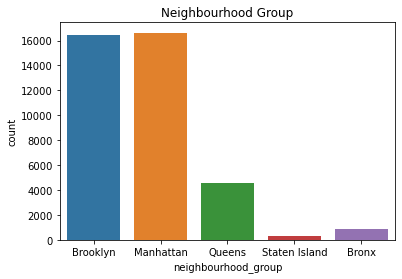

In [22]:
sns.countplot(df['neighbourhood_group'])
plt.title('Neighbourhood Group')

In [23]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Type of Rooms')

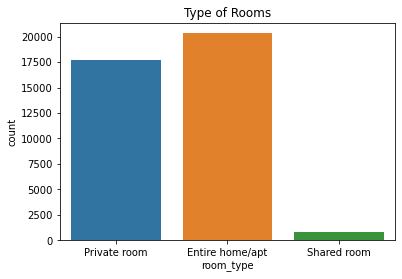

In [24]:
sns.countplot(df['room_type'])
plt.title('Type of Rooms')

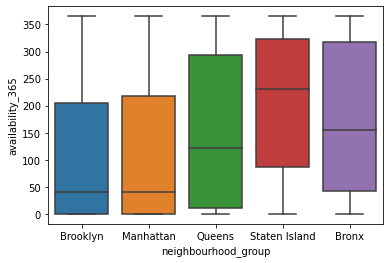

<Figure size 720x720 with 0 Axes>

In [25]:
plot = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')
plt.figure(figsize=(10,10))
plt.show()

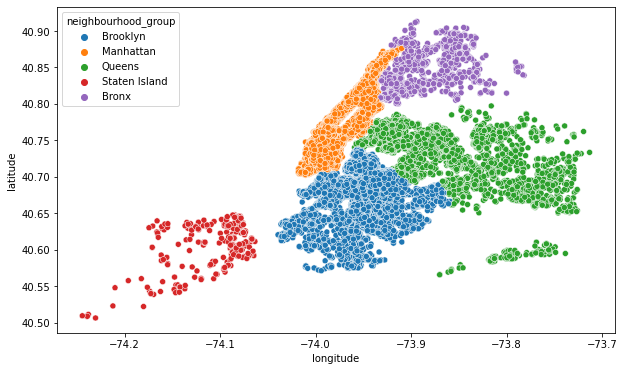

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.show()

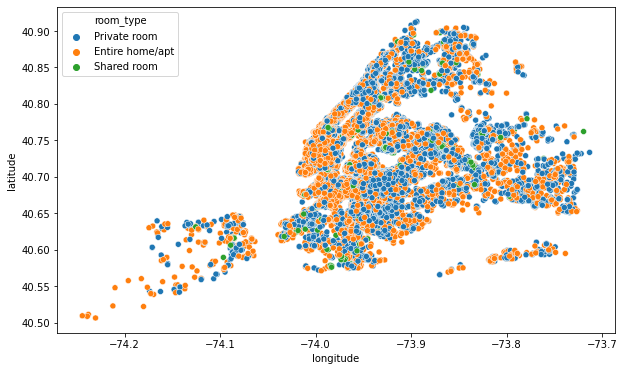

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.show()

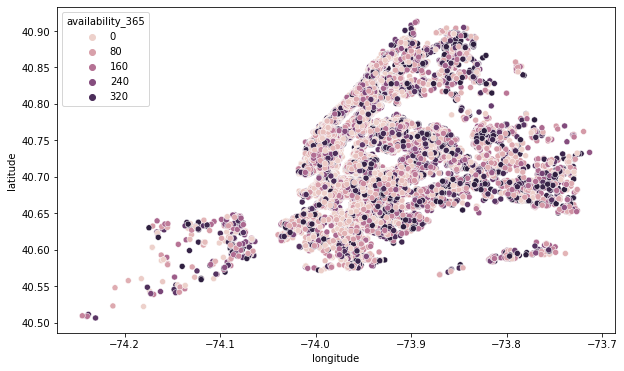

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.show()

In [29]:
df= df[['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']]

In [30]:
df

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129
...,...,...,...,...,...,...
48782,Manhattan,Private room,129,1,1,147
48790,Queens,Private room,45,1,6,339
48799,Staten Island,Private room,235,1,1,87
48805,Bronx,Entire home/apt,100,1,1,40


In [31]:
label_encoder = LabelEncoder()

df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])

In [32]:
col1 = df.columns

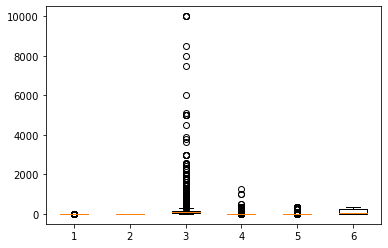

In [33]:
plt.boxplot(df)
plt.show()

In [34]:
for i in col1:
    print(i,'-',df[i].skew())

neighbourhood_group - 0.4148390503234544
room_type - 0.4175939106391302
price - 23.673594295123014
minimum_nights - 27.542187030814464
calculated_host_listings_count - 10.628207094317277
availability_365 - 0.7232180636840273


In [35]:
outlier_df = df.copy()

In [36]:
def iqr_cap(df, cols):
    for i in cols:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_b = q3 + 1.5*iqr
        lower_l = q1 - 1.5*iqr

        df[i] = np.where(df[i] > upper_b, upper_b, np.where(df[i] < lower_l, lower_l, df[i]))
    return df

In [37]:
iqr_cap(outlier_df, col1)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1.0,1.0,149.0,1.0,3.5,365.0
1,2.0,0.0,225.0,1.0,2.0,355.0
3,1.0,0.0,89.0,1.0,1.0,194.0
4,2.0,0.0,80.0,8.5,1.0,0.0
5,2.0,0.0,200.0,3.0,1.0,129.0
...,...,...,...,...,...,...
48782,2.0,1.0,129.0,1.0,1.0,147.0
48790,3.0,1.0,45.0,1.0,3.5,339.0
48799,3.5,1.0,235.0,1.0,1.0,87.0
48805,0.0,0.0,100.0,1.0,1.0,40.0


In [38]:
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

In [39]:
((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

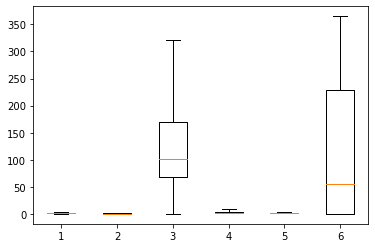

In [40]:
plt.boxplot(outlier_df)
plt.show()

In [41]:
outlier_df['price_n'] = outlier_df['price']

In [42]:
outlier_df = outlier_df.drop('price',axis=1)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
outlier_df[outlier_df.columns[1:]] = scaler.fit_transform(outlier_df[outlier_df.columns[1:]])
outlier_df.head()

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365,price_n
0,1.0,0.925862,-0.938589,2.020548,1.930958,0.265300
1,2.0,-0.919729,-0.938589,0.413561,1.853755,1.237098
3,1.0,-0.919729,-0.938589,-0.657763,0.610783,-0.501910
4,2.0,-0.919729,2.170934,-0.657763,-0.886959,-0.616992
5,2.0,-0.919729,-0.109383,-0.657763,0.108962,0.917428


<AxesSubplot:>

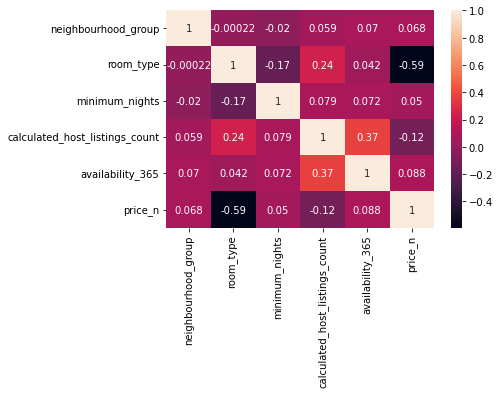

In [44]:
sns.heatmap(outlier_df.select_dtypes(['float64','int64']).corr(),annot=True) 

Regression Analysis and prediction

In [45]:
y= outlier_df.iloc[:,-1]
y

0        0.265300
1        1.237098
3       -0.501910
4       -0.616992
5        0.917428
           ...   
48782    0.009563
48790   -1.064531
48799    1.364967
48805   -0.361255
48852   -1.256333
Name: price_n, Length: 38821, dtype: float64

In [46]:
x= outlier_df.iloc[:,0:5]
x

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,1.0,0.925862,-0.938589,2.020548,1.930958
1,2.0,-0.919729,-0.938589,0.413561,1.853755
3,1.0,-0.919729,-0.938589,-0.657763,0.610783
4,2.0,-0.919729,2.170934,-0.657763,-0.886959
5,2.0,-0.919729,-0.109383,-0.657763,0.108962
...,...,...,...,...,...
48782,2.0,0.925862,-0.938589,-0.657763,0.247928
48790,3.0,0.925862,-0.938589,2.020548,1.730230
48799,3.5,0.925862,-0.938589,-0.657763,-0.215291
48805,0.0,-0.919729,-0.938589,-0.657763,-0.578146


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=200)

In [48]:
y_train.head()

5637    -0.361255
34281    0.278086
19293   -0.169453
8786    -1.320267
9080     0.278086
Name: price_n, dtype: float64

In [49]:
x_train.shape

(31056, 5)

In [50]:
from sklearn.metrics import mean_squared_error

DecisionTreeRegressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test,y_predict))

pred1 = DTree.predict(x_test)
rmse1 = np.sqrt(mean_squared_error(y_test,pred1))
print("rmse: ",rmse1)

r2_score:  0.3834544784275108
rmse:  0.7823784238246112


In [52]:
DTree = DTree.fit(x_train.values, y_train.values)
y_test_pred = DTree.predict(x_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

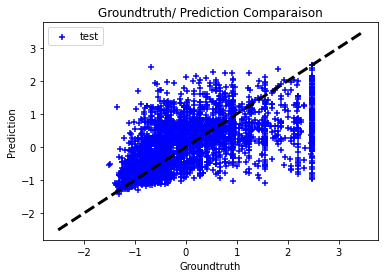

In [53]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test',color='b')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('RF.png')

KNeighborsRegressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [55]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [56]:
pred = knn.predict(x_test)
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test,pred))
rmse = np.sqrt(mean_squared_error(y_test,pred))
print("rmse: ",rmse)

r2_score:  0.4163651272099611
rmse:  0.7612107417061548


In [57]:
knn = knn.fit(x_train.values, y_train.values)
y_test_pred = knn.predict(x_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

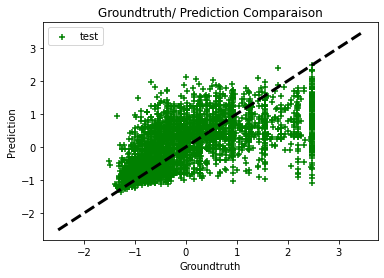

In [58]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test',color='g')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('RF.png')

LinearRegression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test,y_predict))

pred1 = lr.predict(x_test)
rmse1 = np.sqrt(mean_squared_error(y_test,pred1))
print("rmse: ",rmse1)

r2_score:  0.3665967945650377
rmse:  0.793002250441841


In [61]:
lr = lr.fit(x_train.values, y_train.values)
y_test_pred = lr.predict(x_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

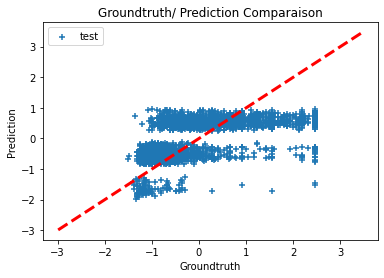

In [62]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='r', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('RF.png')

RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
Rf=RandomForestRegressor(min_samples_leaf=.0001)
Rf.fit(x_train,y_train)
y_predict=Rf.predict(x_test)
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test,y_predict))

pred1 = DTree.predict(x_test)
rmse1 = np.sqrt(mean_squared_error(y_test,pred1))
print("rmse: ",rmse1)

r2_score:  0.4504585125444084
rmse:  0.7824116593552651


In [64]:
Rf = Rf.fit(x_train.values, y_train.values)
y_test_pred = Rf.predict(x_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

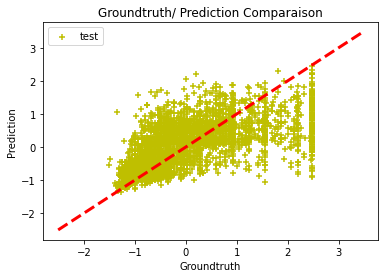

In [65]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test', color='y')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='r', ls='--')

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('RF.png')

In [66]:
'''Therefore, for this Airbnb data set RandomForestRegressor is best model 
 as it give high r2_score and low rmse as compare to various other regression mpdel'''

'Therefore, for this Airbnb data set RandomForestRegressor is best model \n as it give high r2_score and low rmse as compare to various other regression mpdel'